In [104]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import time

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, accuracy_score, average_precision_score, precision_recall_curve, confusion_matrix
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit, RandomizedSearchCV, cross_val_score, GridSearchCV
from scipy.stats import norm
import itertools
import warnings
warnings.filterwarnings("ignore")

In [105]:
org_data = pd.read_csv('/Users/hariprasannaa/Downloads/creditcard.csv')
org_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [106]:
org_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [107]:
# Checking for missing values
org_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [108]:
# checking the percentage of Frauds and No-Frauds in the data
print('No Frauds', round(org_data['Class'].value_counts()[
      0] / len(org_data) * 100, 2), '% of the dataset')
print('Frauds', round(org_data['Class'].value_counts()[
      1] / len(org_data) * 100, 2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


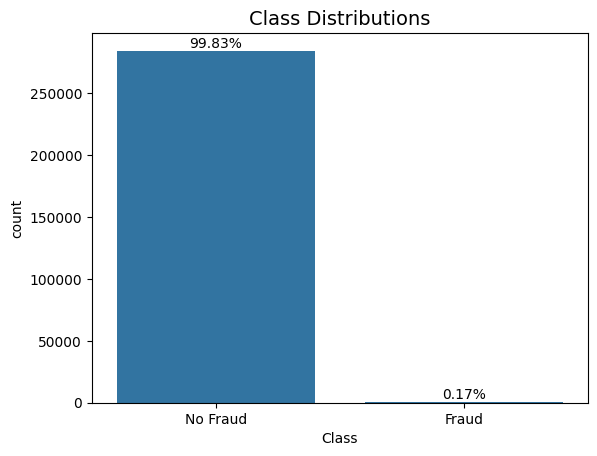

In [109]:
ax = sns.countplot(x='Class', data=org_data)
plt.title('Class Distributions', fontsize=14)
total = len(org_data)
for p in ax.patches:
    percentage = f"{100 * p.get_height() / total:.2f}%"
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2.,
                p.get_height()), ha='center', va='bottom', fontsize=10)
plt.xticks(ticks=[0, 1], labels=['No Fraud', 'Fraud'])
plt.show()

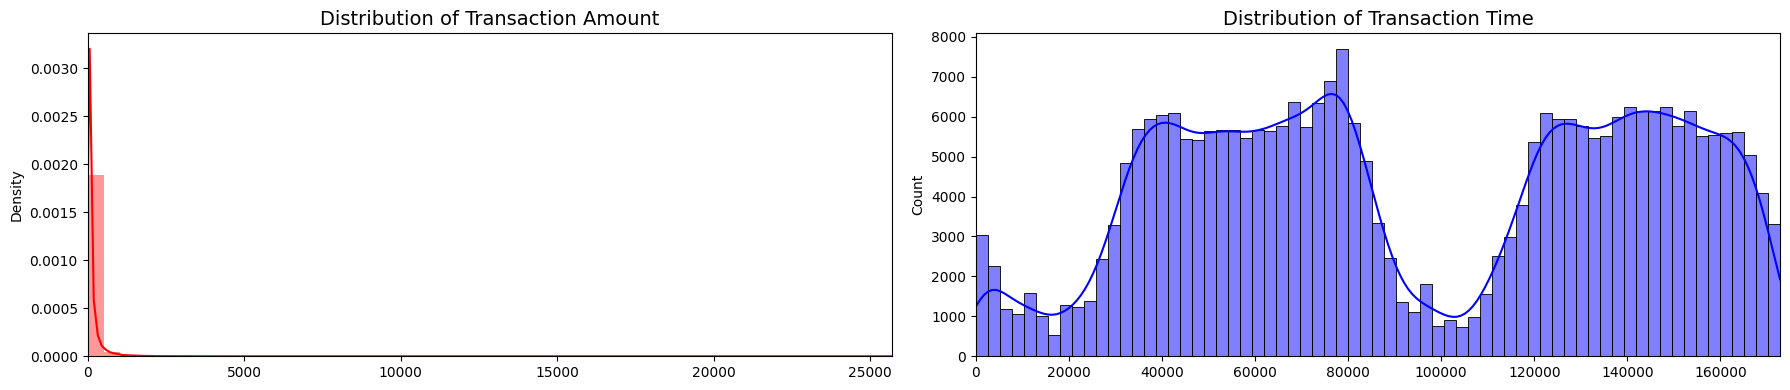

In [110]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = org_data['Amount'].values
time_val = org_data['Time'].values

# Plot distribution of Transaction Amount
sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

# Plot distribution of Transaction Time
sns.histplot(time_val, ax=ax[1], kde=True, color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.tight_layout()
plt.show()

In [111]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

org_data['scaled_amount'] = rob_scaler.fit_transform(
    org_data['Amount'].values.reshape(-1, 1))
org_data['scaled_time'] = rob_scaler.fit_transform(
    org_data['Time'].values.reshape(-1, 1))

org_data.drop(['Time', 'Amount'], axis=1, inplace=True)

scaled_amount = org_data['scaled_amount']
scaled_time = org_data['scaled_time']

org_data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
org_data.insert(0, 'scaled_amount', scaled_amount)
org_data.insert(1, 'scaled_time', scaled_time)

org_data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [112]:
X = org_data.drop('Class', axis=1)
y = org_data['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# checking if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(
    original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(
    original_ytest, return_counts=True)
print(' \n')

print('Label Distributions: \n')
print(train_counts_label / len(original_ytrain))
print(test_counts_label / len(original_ytest))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
 

Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [113]:
# Since our classes are highly imbalanced, we should balance them to ensure the model treats both classes fairly during training.
org_data = org_data.sample(frac=1)

fraud_df = org_data.loc[org_data['Class'] == 1]
non_fraud_df = org_data.loc[org_data['Class'] == 0][:492]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffling dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
221192,-0.279746,0.678756,0.023817,0.729737,0.534480,-0.379319,0.832354,-0.865605,1.175839,-1.779198,...,-0.140626,0.460180,-0.591598,0.128780,0.037632,-1.030084,0.035423,-0.645886,-0.544794,0
8972,2.203032,-0.849387,-4.064005,3.100935,-1.188498,3.264633,-1.903562,0.320351,-0.954940,-3.277535,...,-0.531898,1.688665,-0.078845,0.193731,0.479496,-0.506603,-0.409863,-3.036271,-0.630605,1
71677,0.023755,-0.355890,1.212464,0.250893,0.026692,1.009444,0.276906,0.083187,0.089777,-0.037013,...,-0.080786,0.059362,0.237383,-0.205731,-0.750557,0.719308,-0.202183,0.032717,0.014343,0
184379,0.041920,0.487870,-1.141559,1.927650,-3.905356,-0.073943,-0.044858,-1.756999,-1.217416,0.364563,...,-0.250583,0.102081,-0.531496,-0.328741,0.393100,0.568435,0.786605,-0.146102,0.076211,1
274382,-0.307413,0.955004,-5.766879,-8.402154,0.056543,6.950983,9.880564,-5.773192,-5.748879,0.721743,...,2.493224,0.880395,-0.130436,2.241471,0.665346,-1.890041,-0.120803,0.073269,0.583799,1


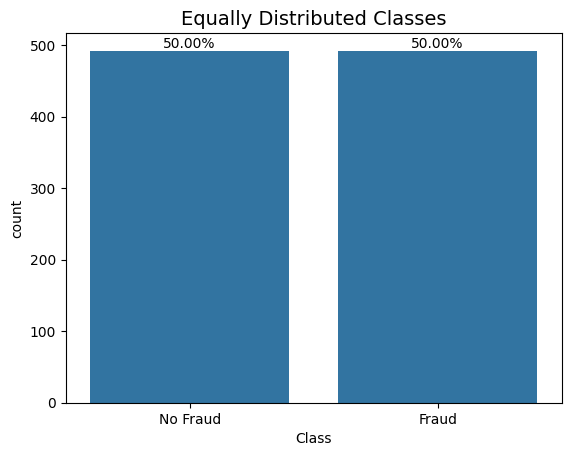

In [114]:
ax = sns.countplot(x='Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
total = len(new_df)
for p in ax.patches:
    percentage = f"{100 * p.get_height() / total:.2f}%"
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2.,
                p.get_height()), ha='center', va='bottom', fontsize=10)
plt.xticks(ticks=[0, 1], labels=['No Fraud', 'Fraud'])
plt.show()

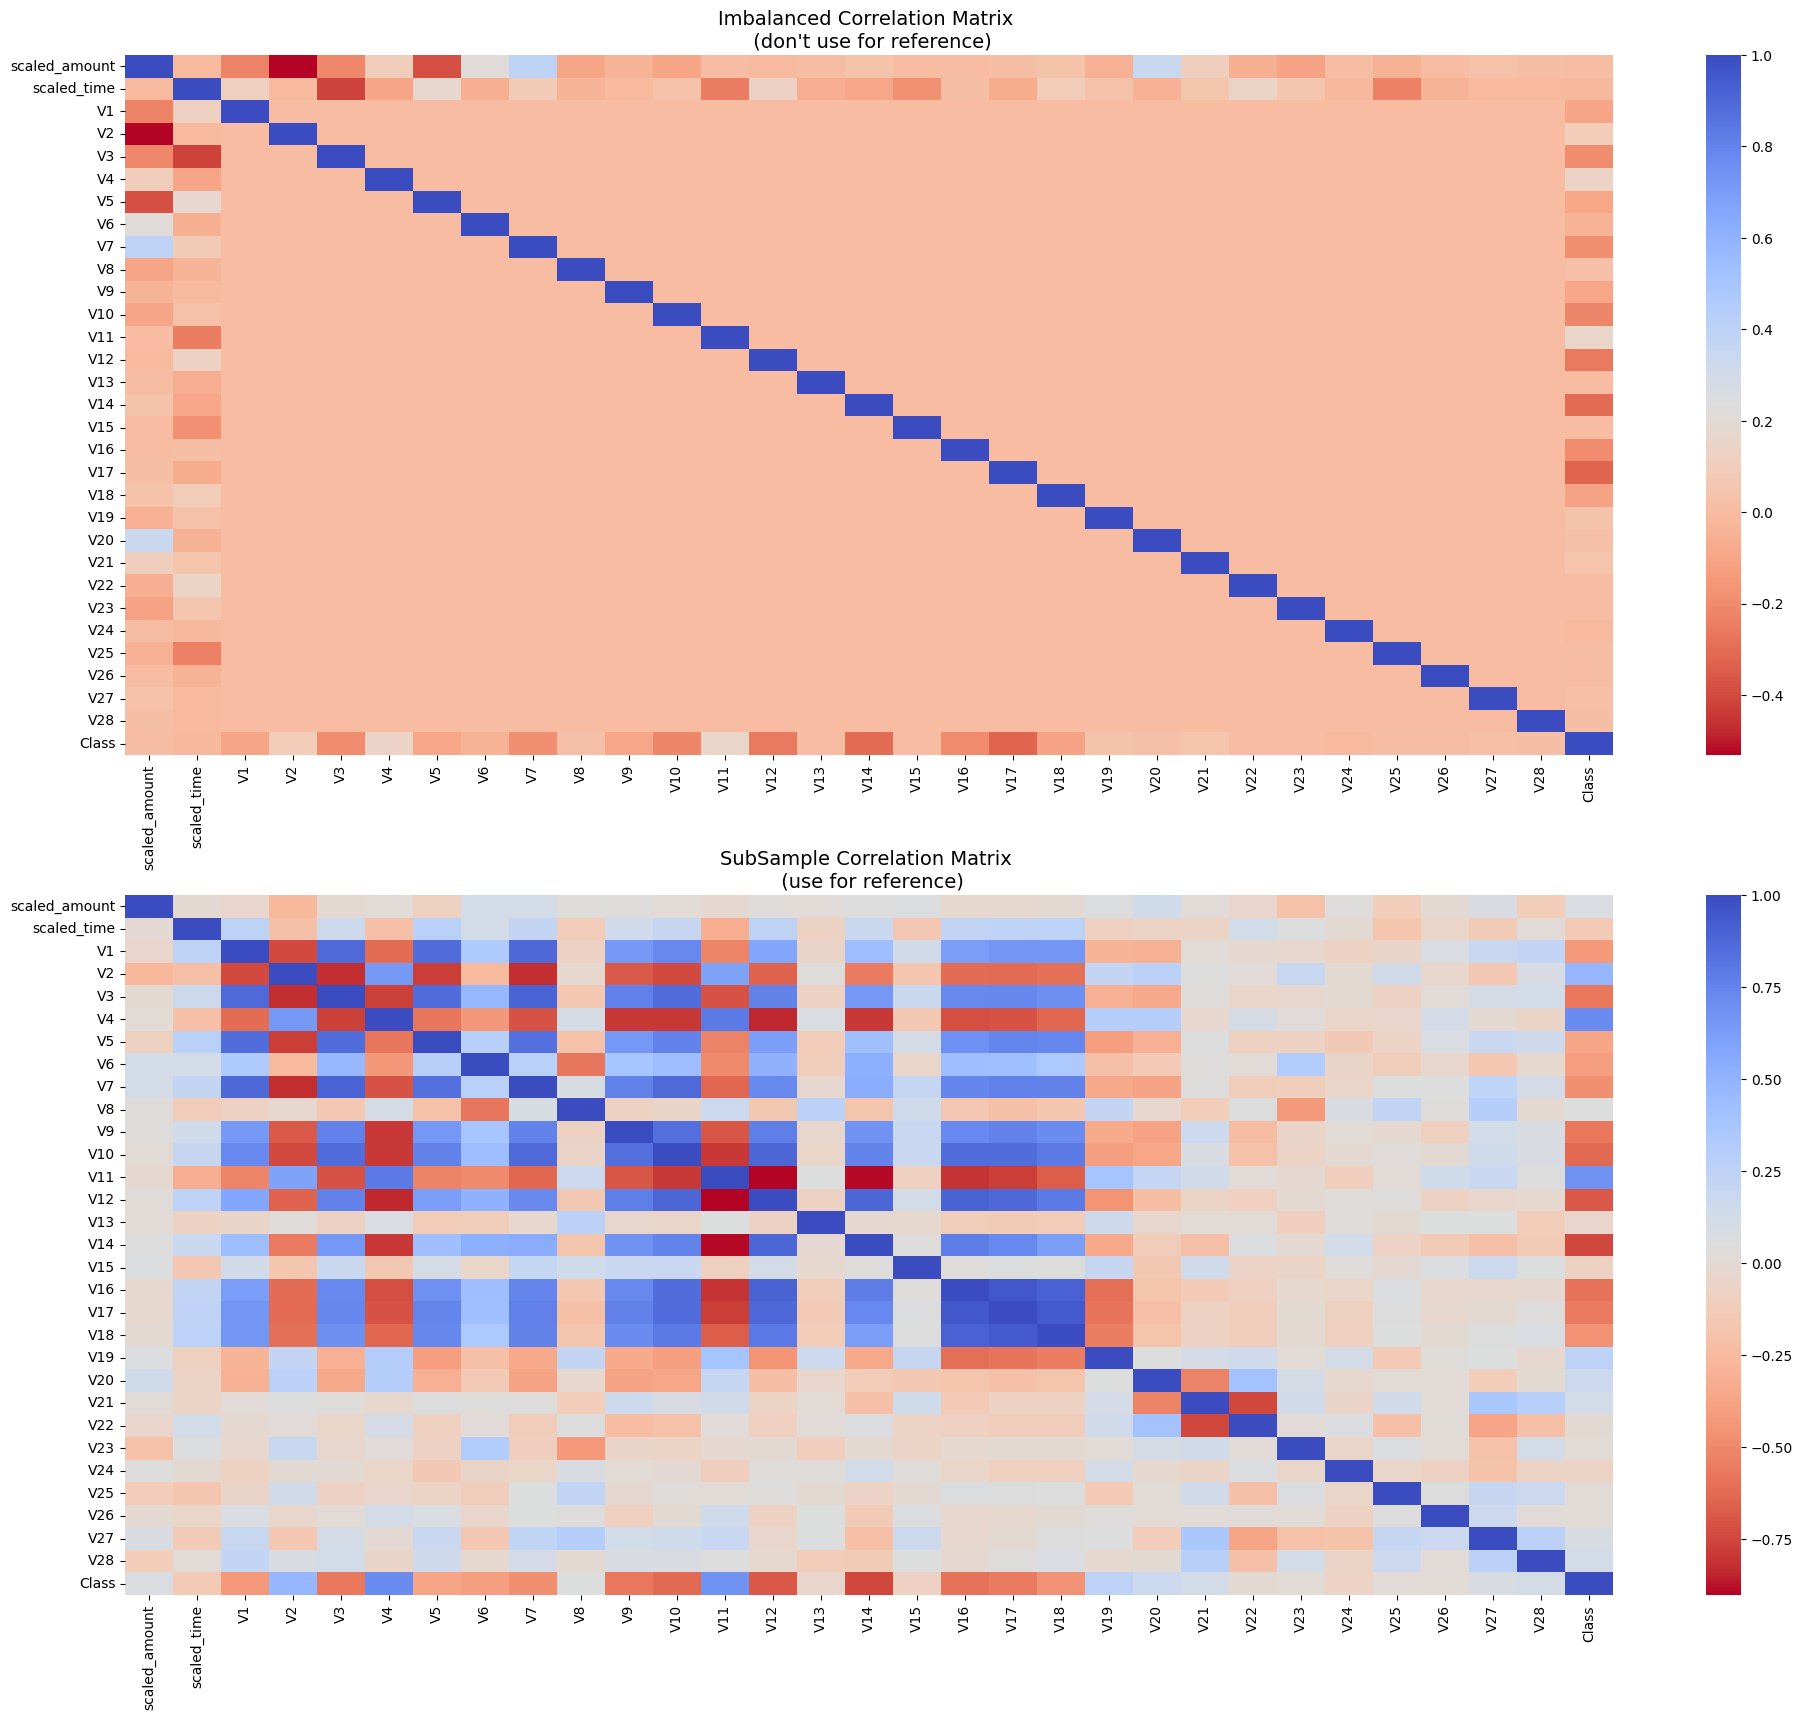

In [115]:
# Make sure we use the subsample in our correlation
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 20))

# Entire Data
corr = org_data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size': 20}, ax=ax1)
ax1.set_title(
    "Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

# Sampled DataFrame
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size': 20}, ax=ax2)
ax2.set_title(
    'SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

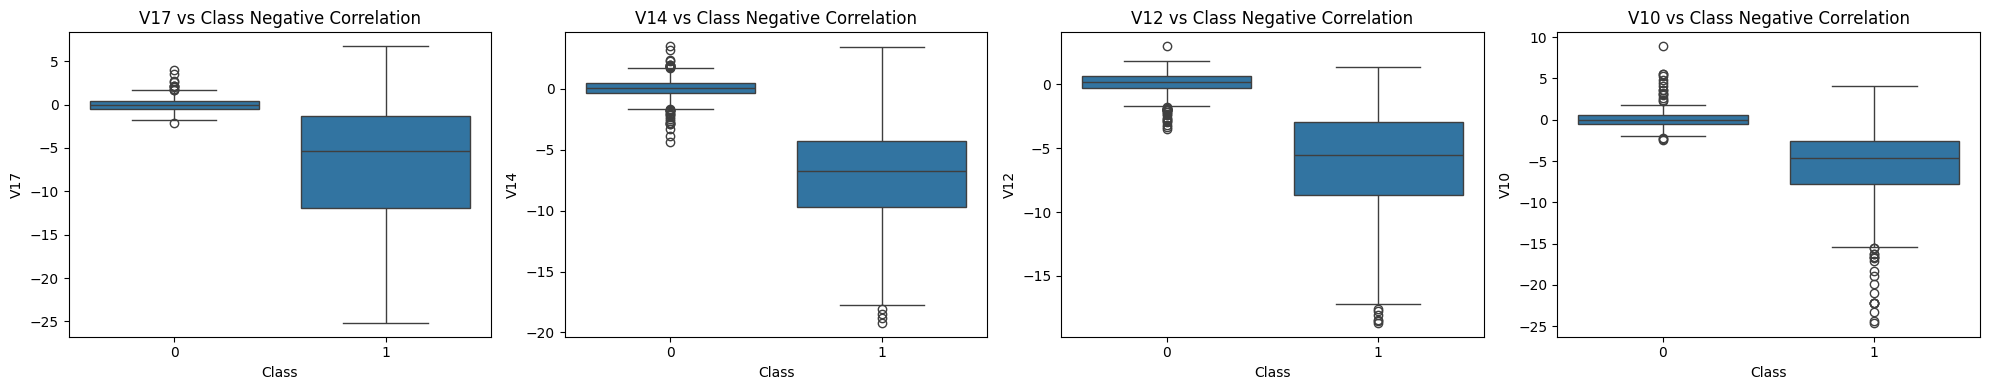

In [116]:
features = ["V17", "V14", "V12", "V10"]

# Create subplots
f, axes = plt.subplots(ncols=len(features), figsize=(20, 4))

# Loop through features and create boxplots
for i, feature in enumerate(features):
    sns.boxplot(x="Class", y=feature, data=new_df, ax=axes[i])
    axes[i].set_title(f'{feature} vs Class Negative Correlation')

plt.tight_layout()
plt.show()

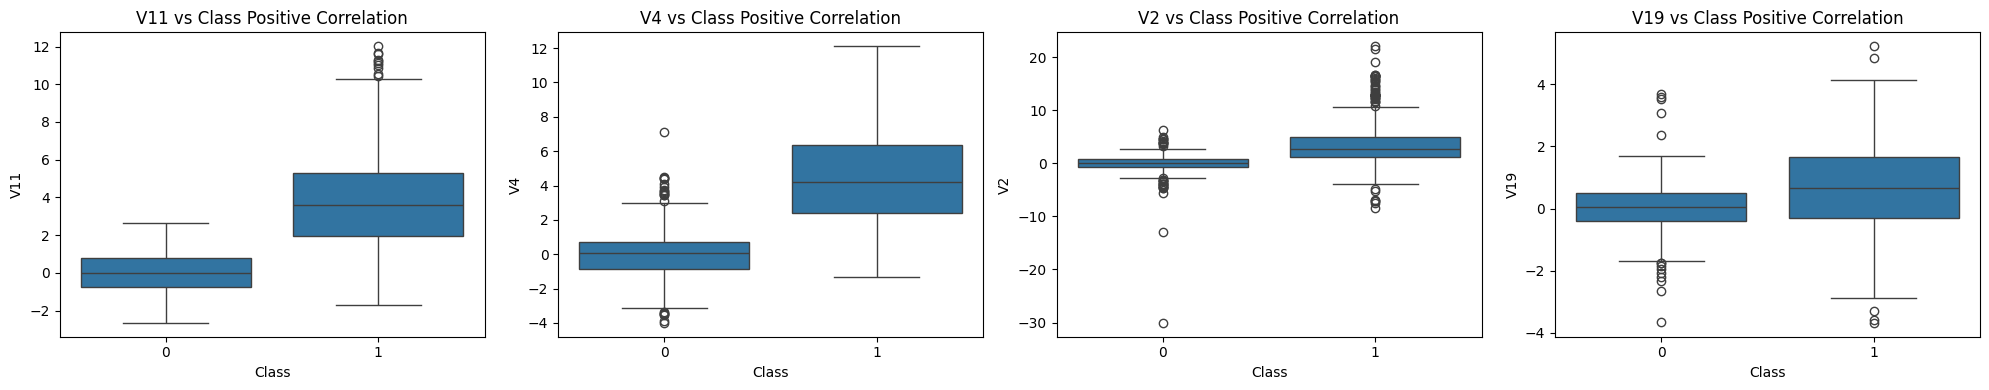

In [117]:
positive_features = ["V11", "V4", "V2", "V19"]

# Create subplots
f, axes = plt.subplots(ncols=len(positive_features), figsize=(20, 4))

# Loop through features and create boxplots
for i, feature in enumerate(positive_features):
    sns.boxplot(x="Class", y=feature, data=new_df, ax=axes[i])
    axes[i].set_title(f'{feature} vs Class Positive Correlation')

plt.tight_layout()
plt.show()

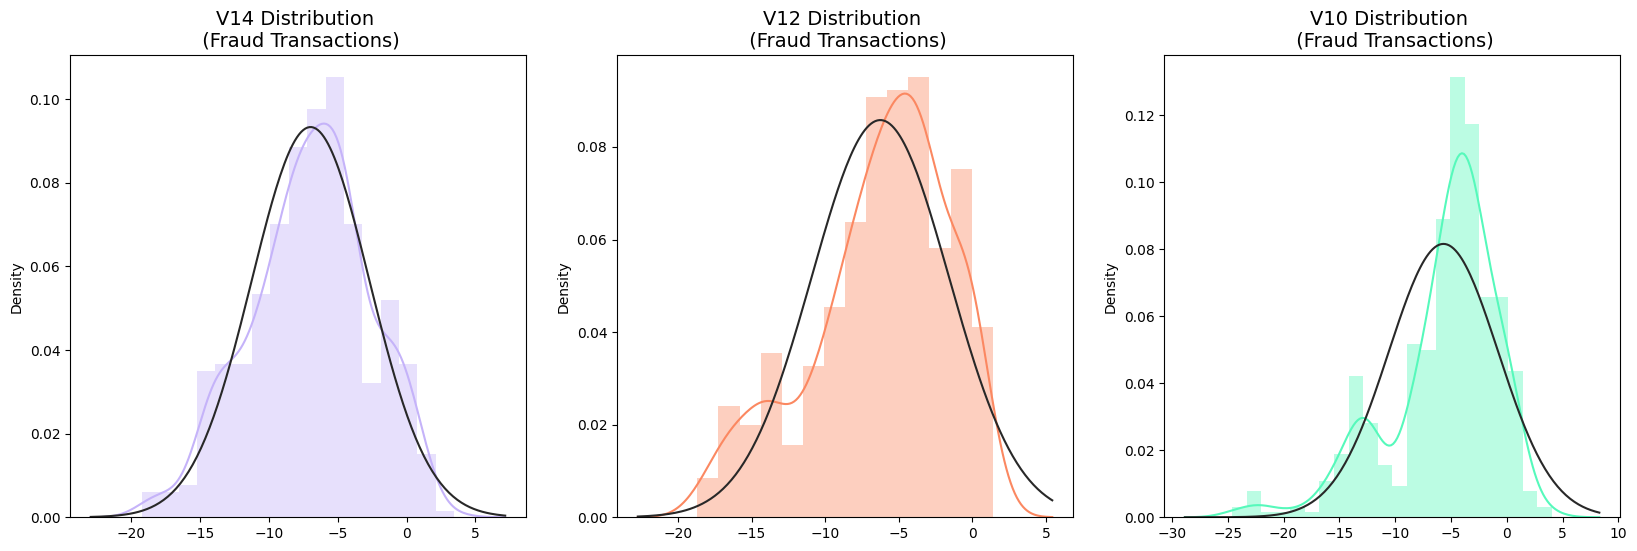

In [118]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

fraud_v14_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(fraud_v14_dist, ax=ax1, fit=norm, color='#C5B3F9')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist, ax=ax2, fit=norm, color='#FB8861')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist, ax=ax3, fit=norm, color='#56F9BB')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [119]:
# Removing Outliers from V14
fraud_v14 = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(fraud_v14, 25), np.percentile(fraud_v14, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in fraud_v14 if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(
    new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('\n')

# Removing outliers from fraud transactions from V12
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(
    new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('\n')


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(
    new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[np.float64(-18.4937733551053), np.float64(-18.8220867423816), np.float64(-19.2143254902614), np.float64(-18.0499976898594)]


V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [np.float64(-18.6837146333443), np.float64(-18.0475965708216), np.float64(-18.4311310279993), np.float64(-18.5536970096458)]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976


V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [np.float64(-15.3460988468775), np.float64(-24.4031849699728), np.float64(-18.2711681738888), np.float64(-15.5637913387301), np.float64(-16.2556117491401), np.float64(-22.1870885620007), np.float64(-15.1241628144947), np.float64(-19.836148851696), np.float64(-16.3035376590131), np.fl

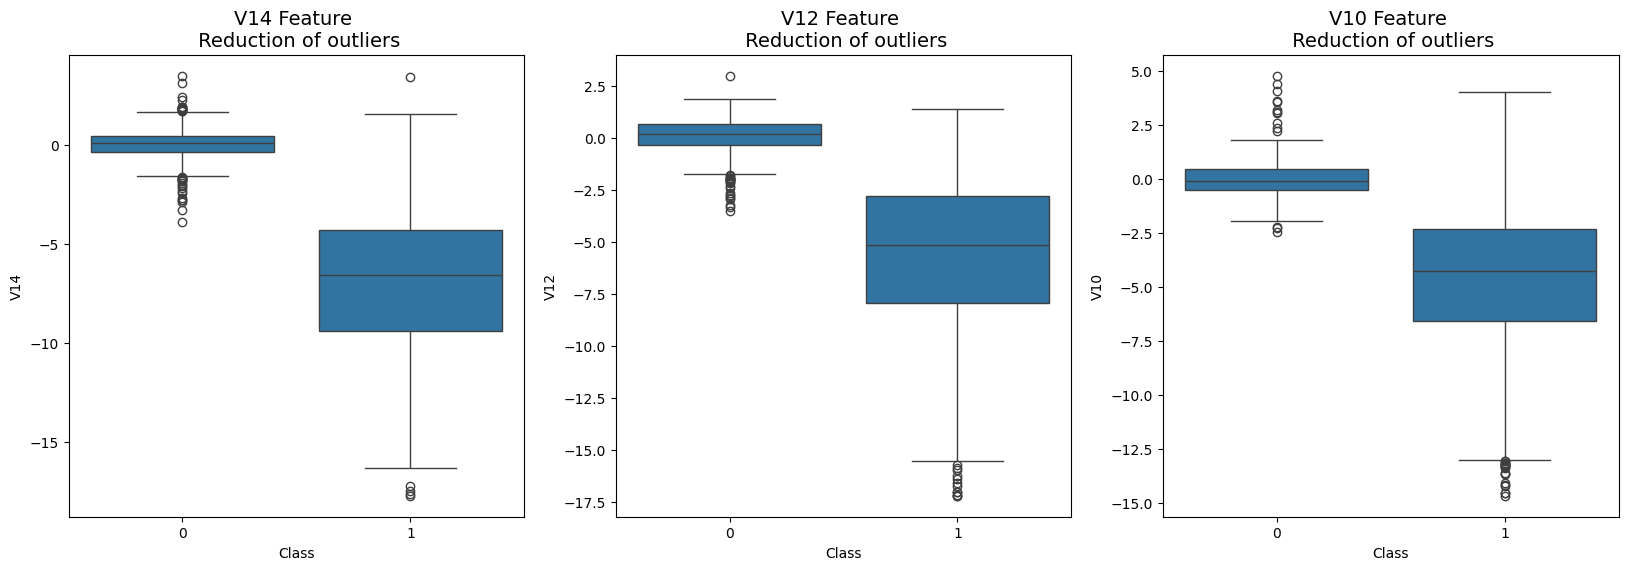

In [120]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Visualizing Boxplots after outliers removed (V14)
sns.boxplot(x="Class", y="V14", data=new_df, ax=ax1)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)

# Visualizing Boxplots after outliers removed (V12)
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)

# Visualizing Boxplots after outliers removed (V10)
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)

plt.show()

In [121]:
# New_df is from the random undersample data
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(
    n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 2.1 s
PCA took 0.013 s
Truncated SVD took 0.0014 s


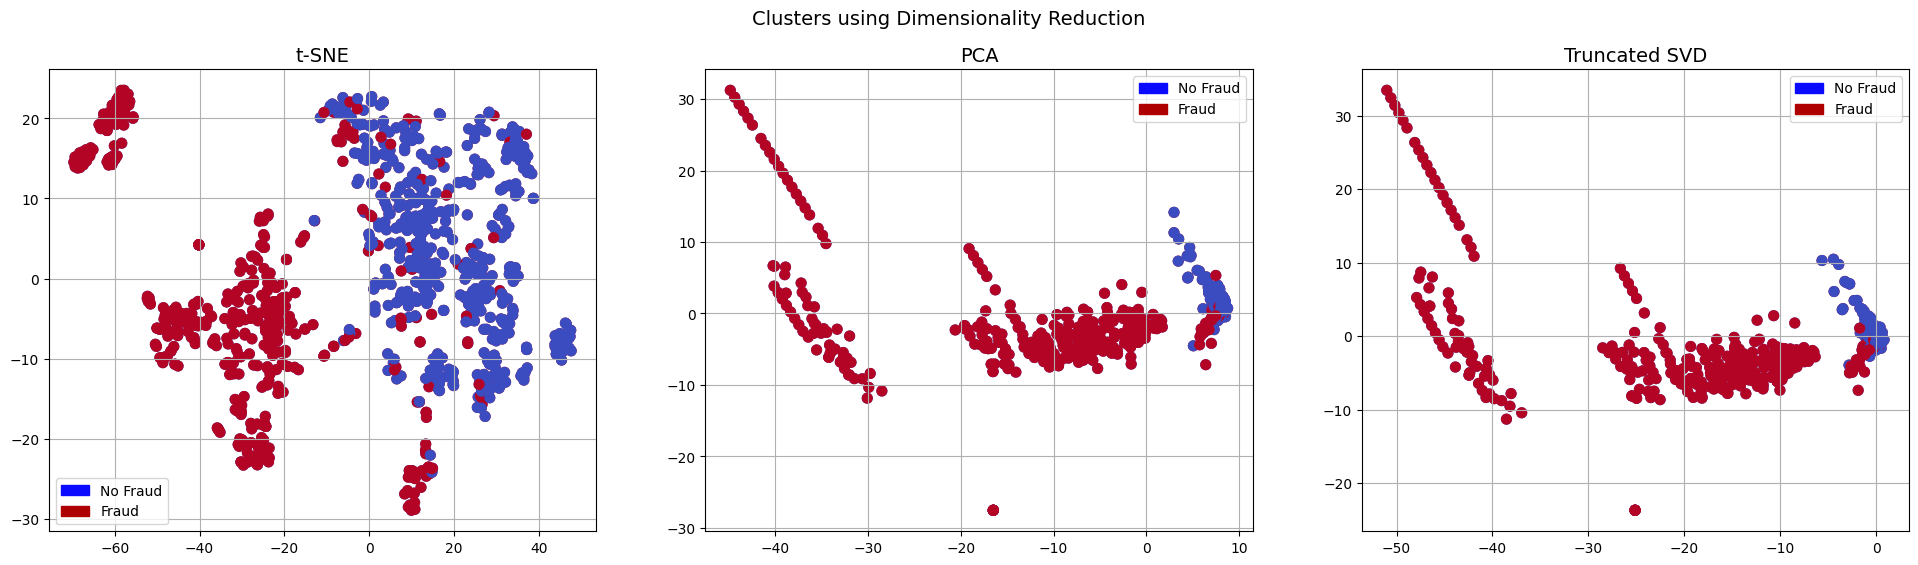

In [122]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=(
    y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=(
    y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=(
    y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=(
    y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:, 0], X_reduced_svd[:, 1], c=(
    y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:, 0], X_reduced_svd[:, 1], c=(
    y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [123]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [124]:
# Spliting our data into training and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [125]:
# Implementing various simple classifiers
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(classifier.__class__.__name__, "has a training (accuracy) score of",
          round(training_score.mean(), 4) * 100)

LogisticRegression has a training (accuracy) score of 94.84
KNeighborsClassifier has a training (accuracy) score of 93.52000000000001
SVC has a training (accuracy) score of 92.72
DecisionTreeClassifier has a training (accuracy) score of 89.95


In [126]:
# Use GridSearchCV to find the best parameters.
# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2, 5, 1)), 'algorithm': [
    'auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)

# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': [
    'rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2, 4, 1)),
               "min_samples_leaf": list(range(5, 7, 1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [127]:
# Overfitting Case
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(
    log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(
    knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score',
      round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score',
      round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.84%
Knears Neighbors Cross Validation Score 93.65%
Support Vector Classifier Cross Validation Score 94.58%
DecisionTree Classifier Cross Validation Score 92.59%


In [128]:
# Rndersampling during cross validating
undersample_X = org_data.drop('Class', axis=1)
undersample_y = org_data['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[
        train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[
        train_index], undersample_y.iloc[test_index]

undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique
X_nearmiss, y_nearmiss = NearMiss().fit_resample(
    undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

# Cross Validating the right way
for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    # SMOTE happens during Cross Validation not before..
    undersample_pipeline = imbalanced_make_pipeline(
        NearMiss(sampling_strategy='majority'), log_reg)
    undersample_model = undersample_pipeline.fit(
        undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(
        undersample_Xtrain[test])

    undersample_accuracy.append(undersample_pipeline.score(
        original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(
        original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(
        original_ytrain[test], undersample_prediction))
    undersample_f1.append(
        f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(
        original_ytrain[test], undersample_prediction))

Train: [ 56959  56960  56961 ... 284804 284805 284806] Test: [    0     1     2 ... 59156 59207 59639]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56959  56960  56961 ... 113925 113926 113927]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113346 113563 113592 ... 170885 170886 170887]
Train: [     0      1      2 ... 284804 284805 284806] Test: [169594 169674 170186 ... 233167 233200 233301]
Train: [     0      1      2 ... 233167 233200 233301] Test: [227835 227836 227837 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({np.int64(0): 492, np.int64(1): 492})


In [129]:
# Plotting LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
        2, 2, figsize=(20, 14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Second Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")

    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")

    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/hariprasannaa/Library/Python/3.9/lib/python/site-packages/matplotlib/pyplot.py'>

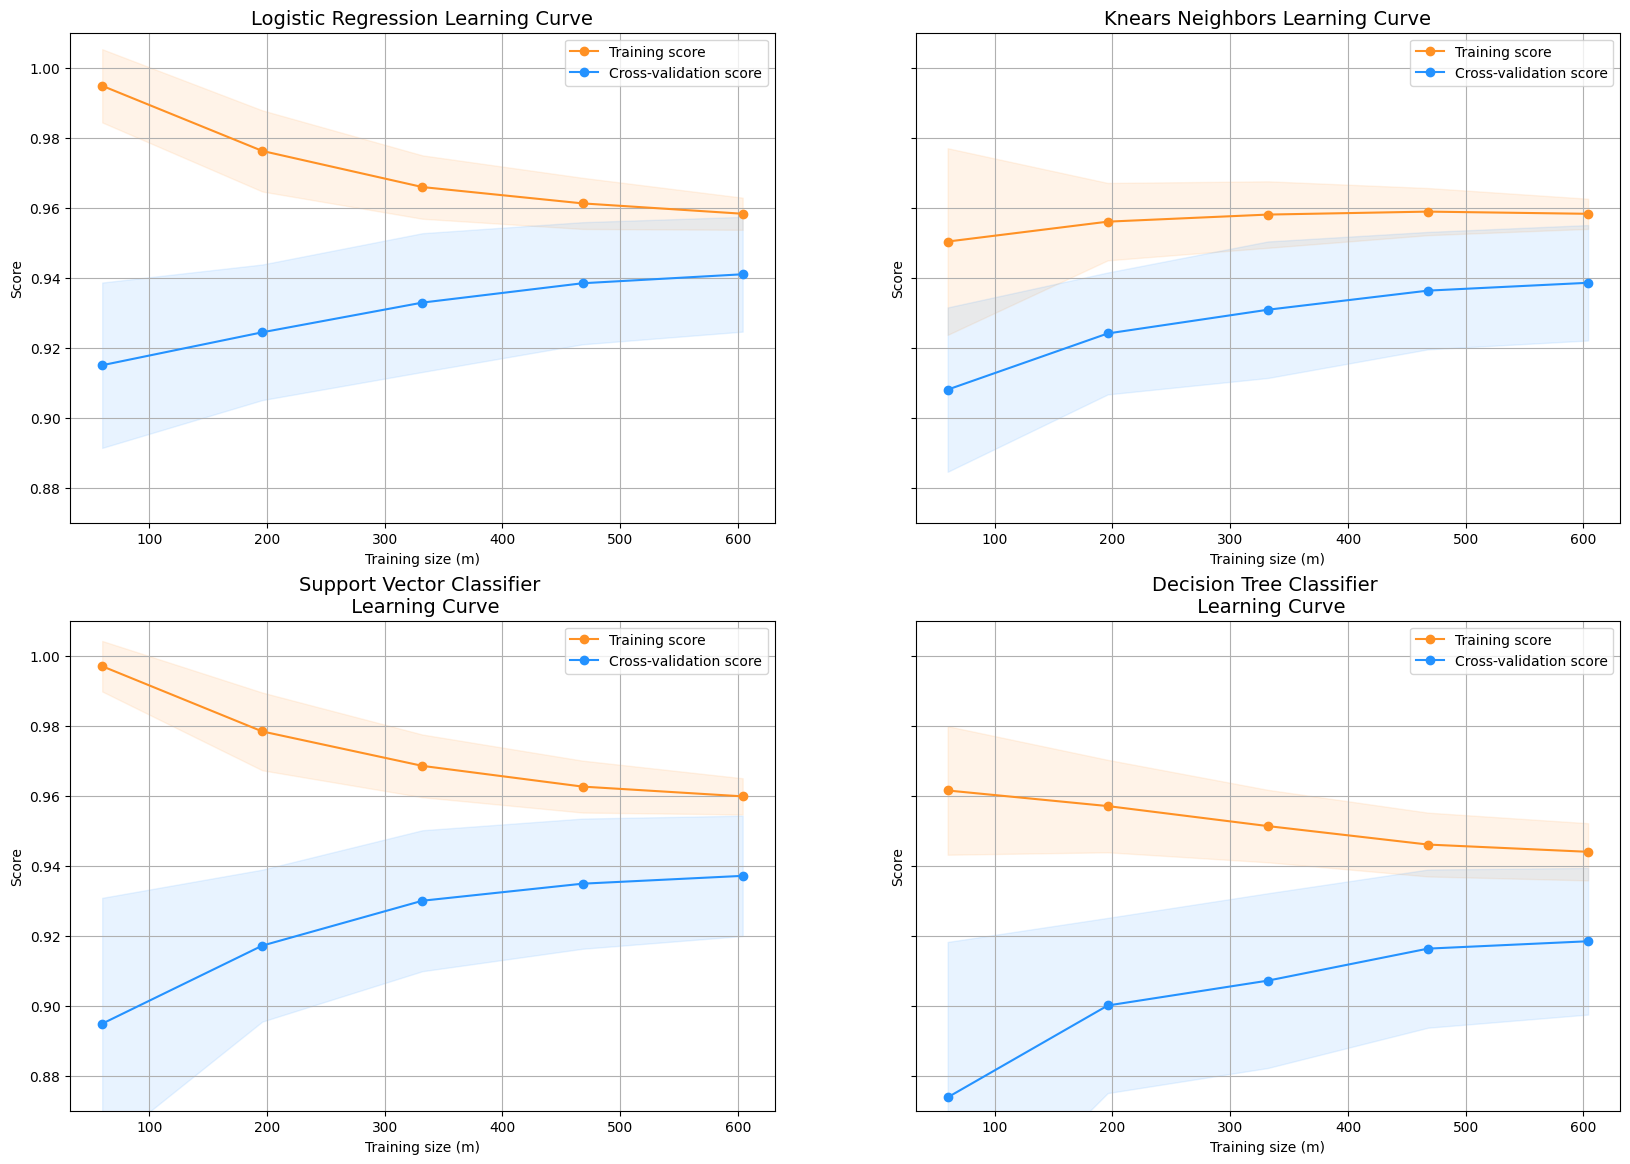

In [130]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf,
                    X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [131]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# Creating a DataFrame with all the scores and the classifiers names
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                                 method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.976806798104159
KNears Neighbors:  0.9350478166979835
Support Vector Classifier:  0.9752432902375411
Decision Tree Classifier:  0.9247833524974057


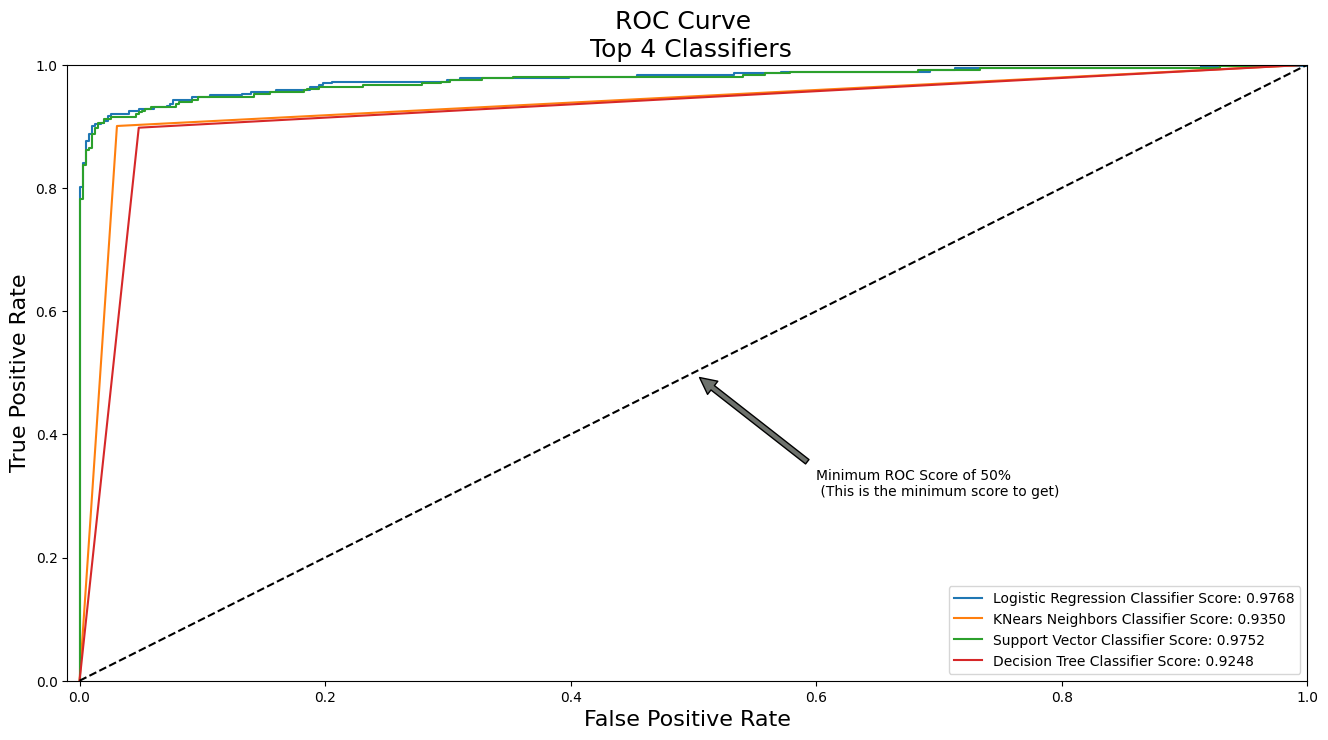

In [132]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16, 8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(
        roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(
        roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(
        roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(
        roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                 arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                 )
    plt.legend()


graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr,
                         knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

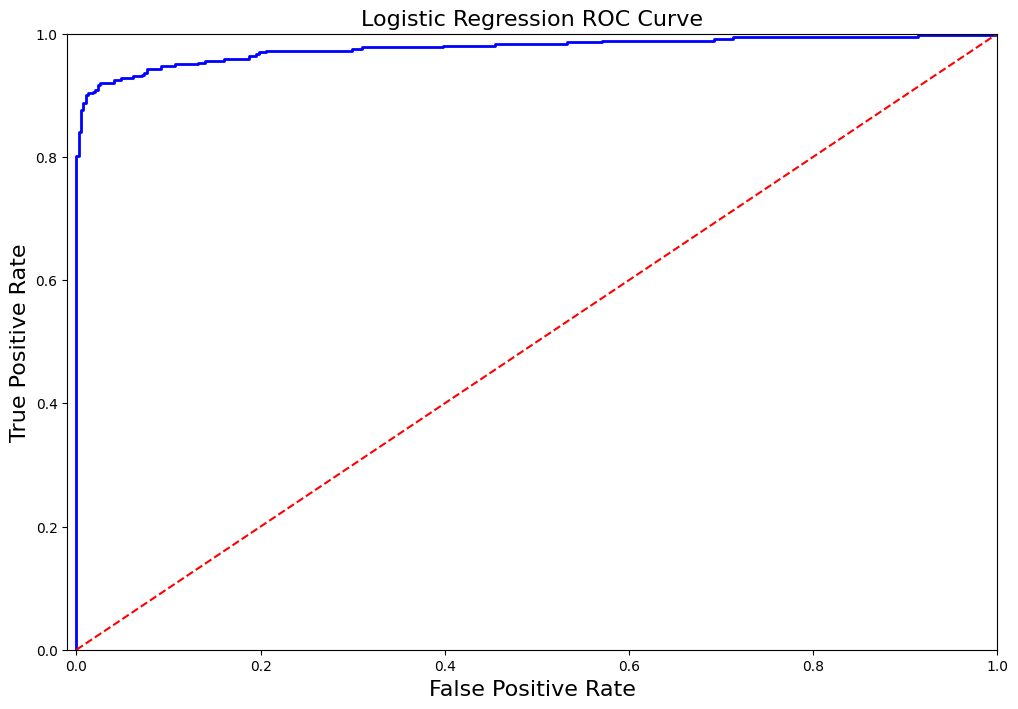

In [133]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12, 8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01, 1, 0, 1])


logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [134]:
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('Overfitting:')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))

print('\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))

Overfitting:
Recall Score: 0.93
Precision Score: 0.64
F1 Score: 0.76
Accuracy Score: 0.71


Accuracy Score: 0.57
Precision Score: 0.00
Recall Score: 0.43
F1 Score: 0.00


In [135]:
undersample_y_score = log_reg.decision_function(original_Xtest)
undersample_average_precision = average_precision_score(
    original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.04


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.04')

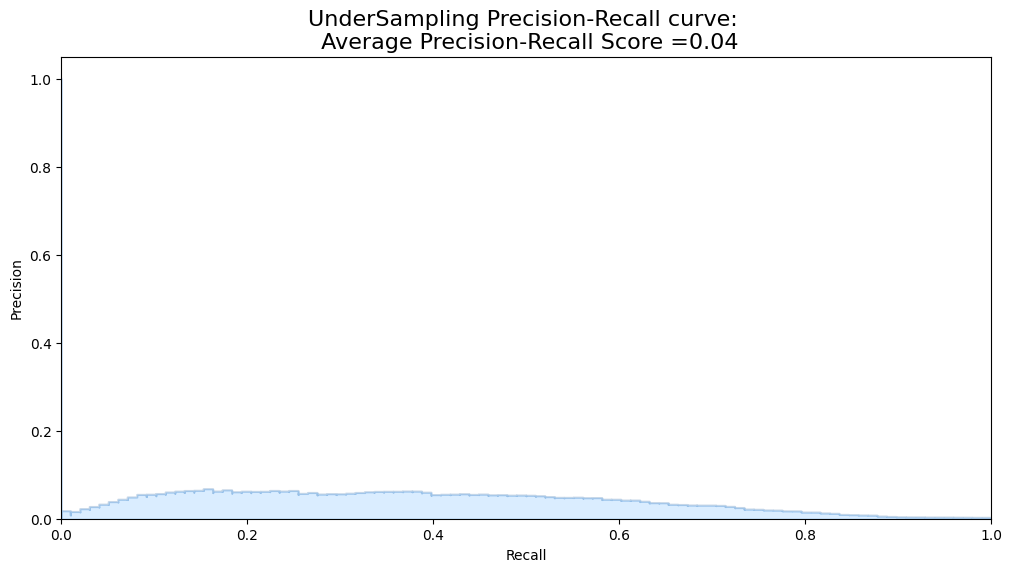

In [136]:
fig = plt.figure(figsize=(12, 6))

precision, recall, _ = precision_recall_curve(
    original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

In [137]:
# Logistic Regression Parameters
log_reg_params = {"penalty": ['l1', 'l2'], "C": [
    0.001, 0.01, 0.1, 1, 10, 100, 1000], "solver": ['liblinear']}

# Stratified Shuffle Split
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Instantiate RandomizedSearchCV outside the loop
rand_log_reg = RandomizedSearchCV(LogisticRegression(
    max_iter=1000), log_reg_params, n_iter=4, cv=sss, random_state=42)

# Lists to store metrics
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Cross-validation with SMOTE
for train_idx, test_idx in sss.split(original_Xtrain, original_ytrain):
    # Create pipeline with SMOTE and RandomizedSearchCV
    pipeline = imbalanced_make_pipeline(
        SMOTE(sampling_strategy='minority'), rand_log_reg)

    # Fit pipeline on training split
    pipeline.fit(original_Xtrain[train_idx], original_ytrain[train_idx])

    # Predict on test split
    predictions = pipeline.predict(original_Xtrain[test_idx])

    # Evaluate metrics
    accuracy_lst.append(pipeline.score(
        original_Xtrain[test_idx], original_ytrain[test_idx]))
    precision_lst.append(precision_score(
        original_ytrain[test_idx], predictions))
    recall_lst.append(recall_score(original_ytrain[test_idx], predictions))
    f1_lst.append(f1_score(original_ytrain[test_idx], predictions))
    auc_lst.append(roc_auc_score(original_ytrain[test_idx], predictions))

# Print averaged metrics
print("Cross-Validated Metrics:")
print("Accuracy: {:.4f}".format(np.mean(accuracy_lst)))
print("Precision: {:.4f}".format(np.mean(precision_lst)))
print("Recall: {:.4f}".format(np.mean(recall_lst)))
print("F1 Score: {:.4f}".format(np.mean(f1_lst)))
print("AUC: {:.4f}".format(np.mean(auc_lst)))

Cross-Validated Metrics:
Accuracy: 0.9788
Precision: 0.0700
Recall: 0.9089
F1 Score: 0.1300
AUC: 0.9439


In [138]:
labels = ['No Fraud', 'Fraud']
smote_prediction = pipeline.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.11      0.85      0.20        98

    accuracy                           0.99     56961
   macro avg       0.56      0.92      0.60     56961
weighted avg       1.00      0.99      0.99     56961



In [139]:
y_score = pipeline.named_steps['randomizedsearchcv'].decision_function(
    original_Xtest)

average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.78


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.78')

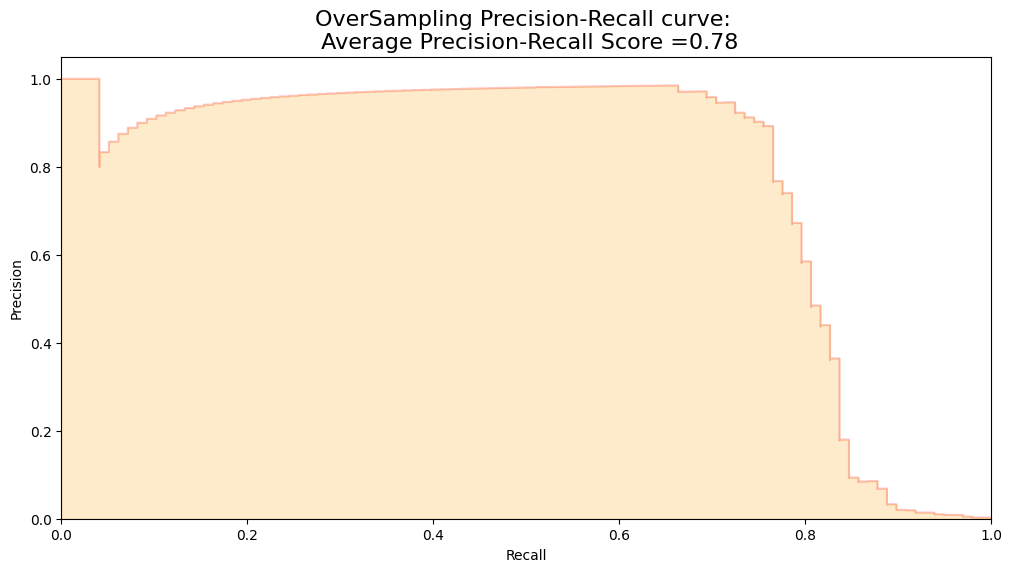

In [140]:
fig = plt.figure(figsize=(12, 6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [141]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=42)
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [142]:
# Implementing GridSearchCV and the other models.
# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :1.095555067062378 sec


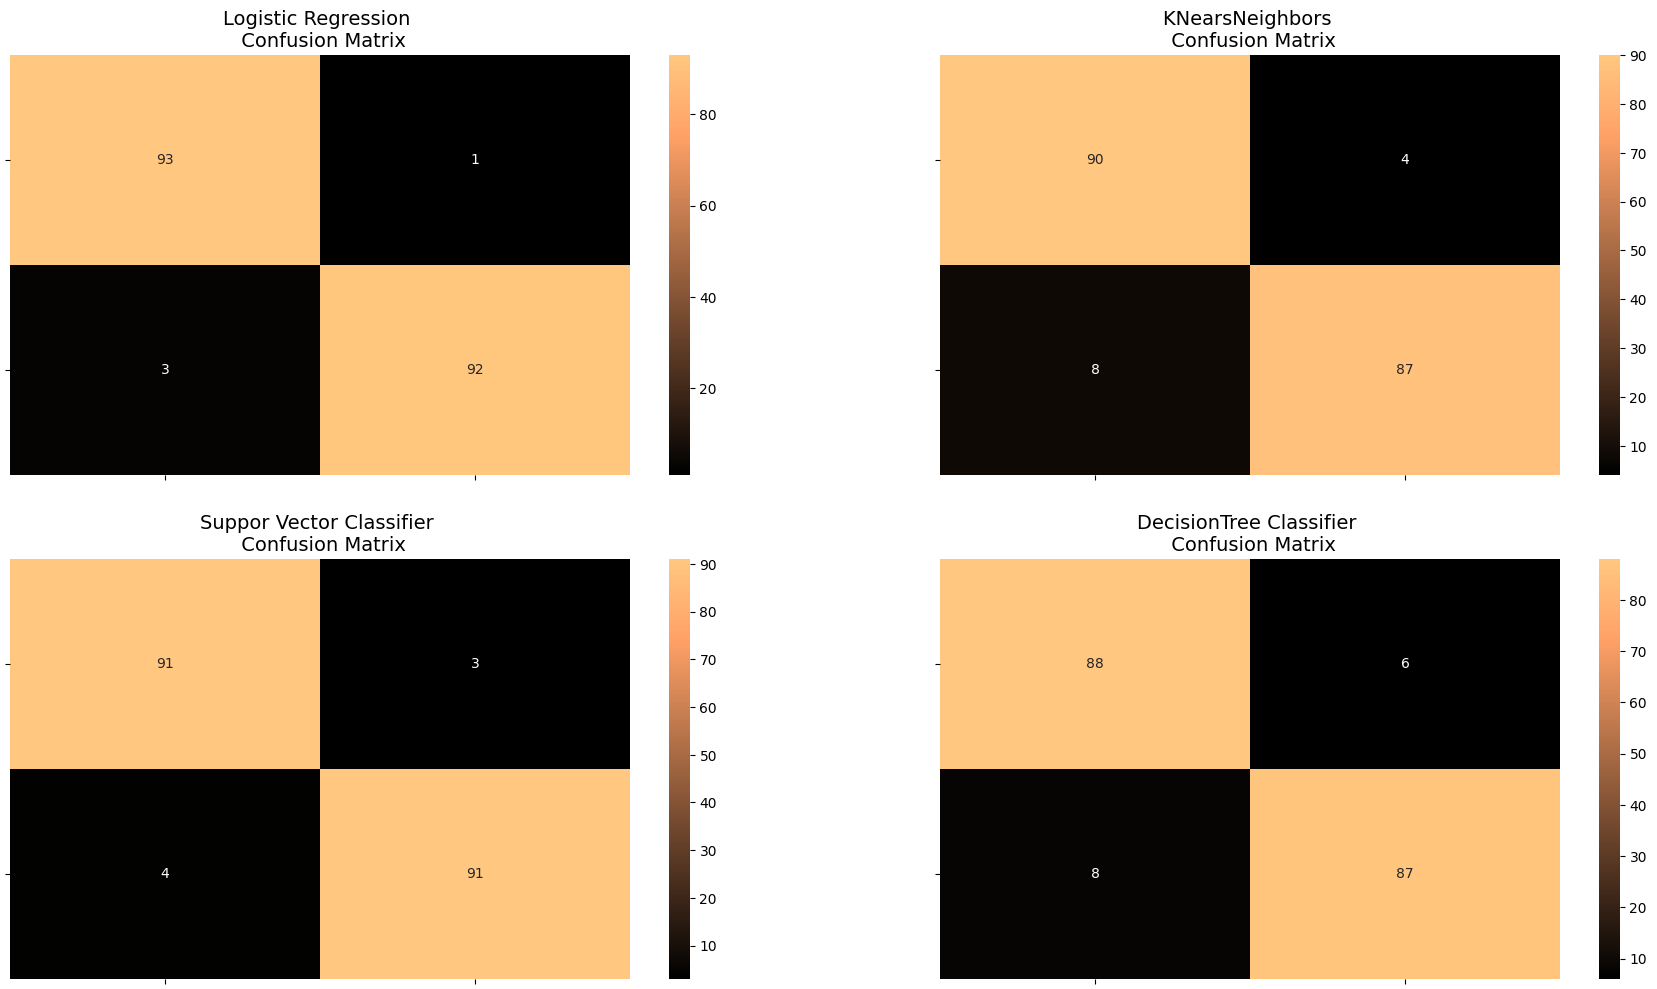

In [143]:
# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2, figsize=(22, 12))

sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

In [144]:
print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        94
           1       0.99      0.97      0.98        95

    accuracy                           0.98       189
   macro avg       0.98      0.98      0.98       189
weighted avg       0.98      0.98      0.98       189

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        94
           1       0.96      0.92      0.94        95

    accuracy                           0.94       189
   macro avg       0.94      0.94      0.94       189
weighted avg       0.94      0.94      0.94       189

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        94
           1       0.97      0.96      0.96        95

    accuracy                           0.96       189
   macro avg       0.96      0.96      0.96       189
weighted

In [145]:
# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = pipeline.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [
    undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)
final_df

,Technique,Score
0,Random UnderSampling,0.978836
1,Oversampling (SMOTE),0.988518


In [150]:
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras.layers import Dense

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(64, input_shape=(n_inputs,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')
])
undersample_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,626 (18.07 KB)

 Trainable params: 4,626 (18.07 KB)

 Non-trainable params: 0 (0.00 B)

In [151]:
undersample_model.compile(Adam(learning_rate=0.001),
                          loss='sparse_categorical_crossentropy', metrics=['accuracy'])

undersample_model.fit(X_train, y_train, validation_split=0.2,
                      batch_size=25, epochs=20, shuffle=True, verbose=2)

undersample_predictions = undersample_model.predict(
    original_Xtest, batch_size=200, verbose=0)

undersample_fraud_predictions = np.argmax(undersample_model.predict(
    original_Xtest, batch_size=200, verbose=0), axis=1)

Epoch 1/20
25/25 - 0s - 18ms/step - accuracy: 0.7185 - loss: 0.7640 - val_accuracy: 0.8487 - val_loss: 0.3708
Epoch 2/20
25/25 - 0s - 2ms/step - accuracy: 0.9156 - loss: 0.3019 - val_accuracy: 0.9276 - val_loss: 0.2613
Epoch 3/20
25/25 - 0s - 2ms/step - accuracy: 0.9404 - loss: 0.2109 - val_accuracy: 0.9211 - val_loss: 0.2079
Epoch 4/20
25/25 - 0s - 2ms/step - accuracy: 0.9503 - loss: 0.1607 - val_accuracy: 0.9211 - val_loss: 0.1924
Epoch 5/20
25/25 - 0s - 2ms/step - accuracy: 0.9520 - loss: 0.1342 - val_accuracy: 0.9145 - val_loss: 0.1848
Epoch 6/20
25/25 - 0s - 2ms/step - accuracy: 0.9586 - loss: 0.1165 - val_accuracy: 0.9145 - val_loss: 0.1803
Epoch 7/20
25/25 - 0s - 2ms/step - accuracy: 0.9586 - loss: 0.1034 - val_accuracy: 0.9145 - val_loss: 0.1768
Epoch 8/20
25/25 - 0s - 2ms/step - accuracy: 0.9669 - loss: 0.0929 - val_accuracy: 0.9211 - val_loss: 0.1749
Epoch 9/20
25/25 - 0s - 2ms/step - accuracy: 0.9719 - loss: 0.0849 - val_accuracy: 0.9145 - val_loss: 0.1690
Epoch 10/20
25/25 

In [153]:
# Function to print and plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[54199  2664]
 [    5    93]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


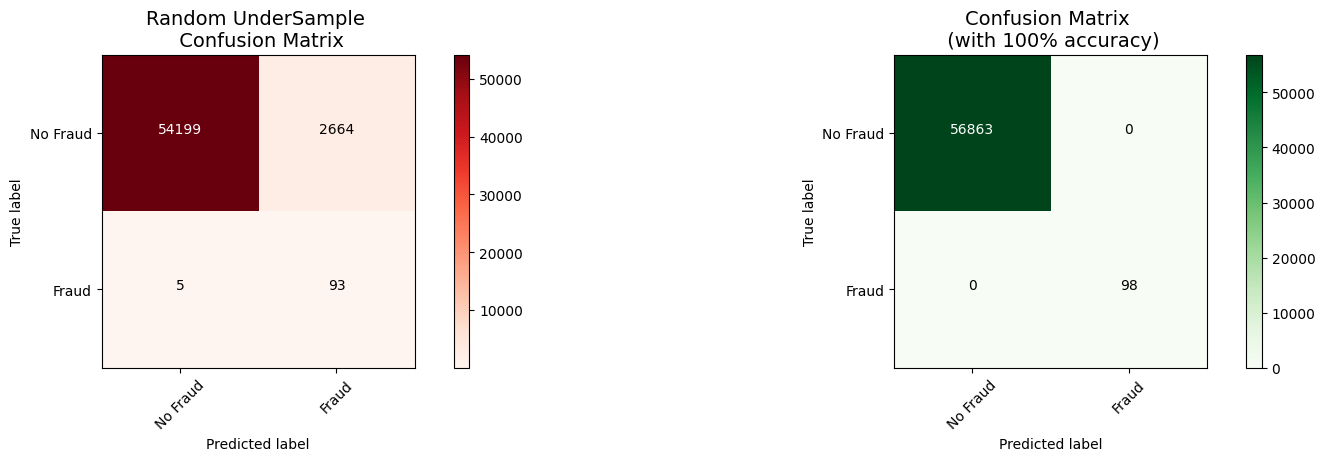

In [154]:
undersample_cm = confusion_matrix(
    original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)

fig = plt.figure(figsize=(16, 8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels,
                      title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(
    actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

In [155]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [156]:
oversample_model.compile(Adam(learning_rate=0.001),
                         loss='sparse_categorical_crossentropy', metrics=['accuracy'])

oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2,
                     batch_size=300, epochs=20, shuffle=True, verbose=2)

oversample_predictions = oversample_model.predict(
    original_Xtest, batch_size=200, verbose=0)

oversample_fraud_predictions = np.argmax(oversample_model.predict(
    original_Xtest, batch_size=200, verbose=0), axis=1)

Epoch 1/20
1214/1214 - 1s - 917us/step - accuracy: 0.9772 - loss: 0.0632 - val_accuracy: 0.9937 - val_loss: 0.0224
Epoch 2/20
1214/1214 - 1s - 617us/step - accuracy: 0.9970 - loss: 0.0138 - val_accuracy: 0.9997 - val_loss: 0.0070
Epoch 3/20
1214/1214 - 1s - 565us/step - accuracy: 0.9984 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 4/20
1214/1214 - 1s - 557us/step - accuracy: 0.9990 - loss: 0.0054 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 5/20
1214/1214 - 1s - 561us/step - accuracy: 0.9992 - loss: 0.0042 - val_accuracy: 0.9999 - val_loss: 0.0017
Epoch 6/20
1214/1214 - 1s - 606us/step - accuracy: 0.9994 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 7/20
1214/1214 - 1s - 566us/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 6.6693e-04
Epoch 8/20
1214/1214 - 1s - 570us/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 7.6256e-04
Epoch 9/20
1214/1214 - 1s - 555us/step - accuracy: 0.9996 - loss: 0.0021

Confusion matrix, without normalization
[[56848    15]
 [   26    72]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


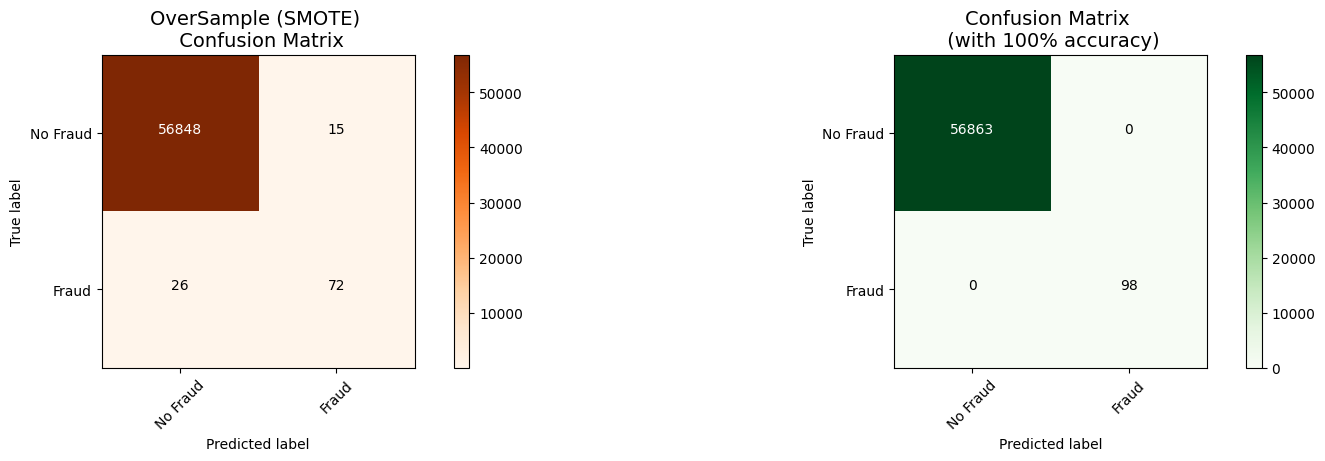

In [157]:
oversample_smote = confusion_matrix(
    original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)

fig = plt.figure(figsize=(16, 8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels,
                      title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(
    actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)